In [1]:
pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [2]:
%reload_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)
import numpy as np
import pandas as pd

C:\Users\julon\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

In [4]:
graph1 = df[['Gender','Education']]
graph1 = round(100*graph1.groupby('Gender').count()/graph1.shape[0]).reset_index()
graph1

,Gender,Education
0,Female,47.0
1,Male,53.0


In [5]:
%R -i graph1

In [6]:
%R library(waffle)

array(['waffle', 'scales', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [7]:
df['JobTitle'].unique()

array(['Marketing Associate', 'Graphic Designer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Data Scientist', 'Financial Analyst',
       'Driver', 'Software Engineer', 'Manager'], dtype=object)

In [8]:
roles = df[['Gender','JobTitle']]
new = roles['JobTitle'].isin(['Software Engineer','Manager'])
roles = roles[new]
roles['Count'] = 1
roles = roles.groupby(['Gender','JobTitle']).count().reset_index()
roles.columns = ['Gender', 'JobTitle', 'Count']
roles

,Gender,JobTitle,Count
0,Female,Manager,18
1,Female,Software Engineer,8
2,Male,Manager,72
3,Male,Software Engineer,101


In [9]:
role_order_list = ['Software Engineer','Manager']
roles.JobTitle = roles.JobTitle.astype(pd.api.types.CategoricalDtype(categories=role_order_list, ordered = True))

In [10]:
%R -i roles

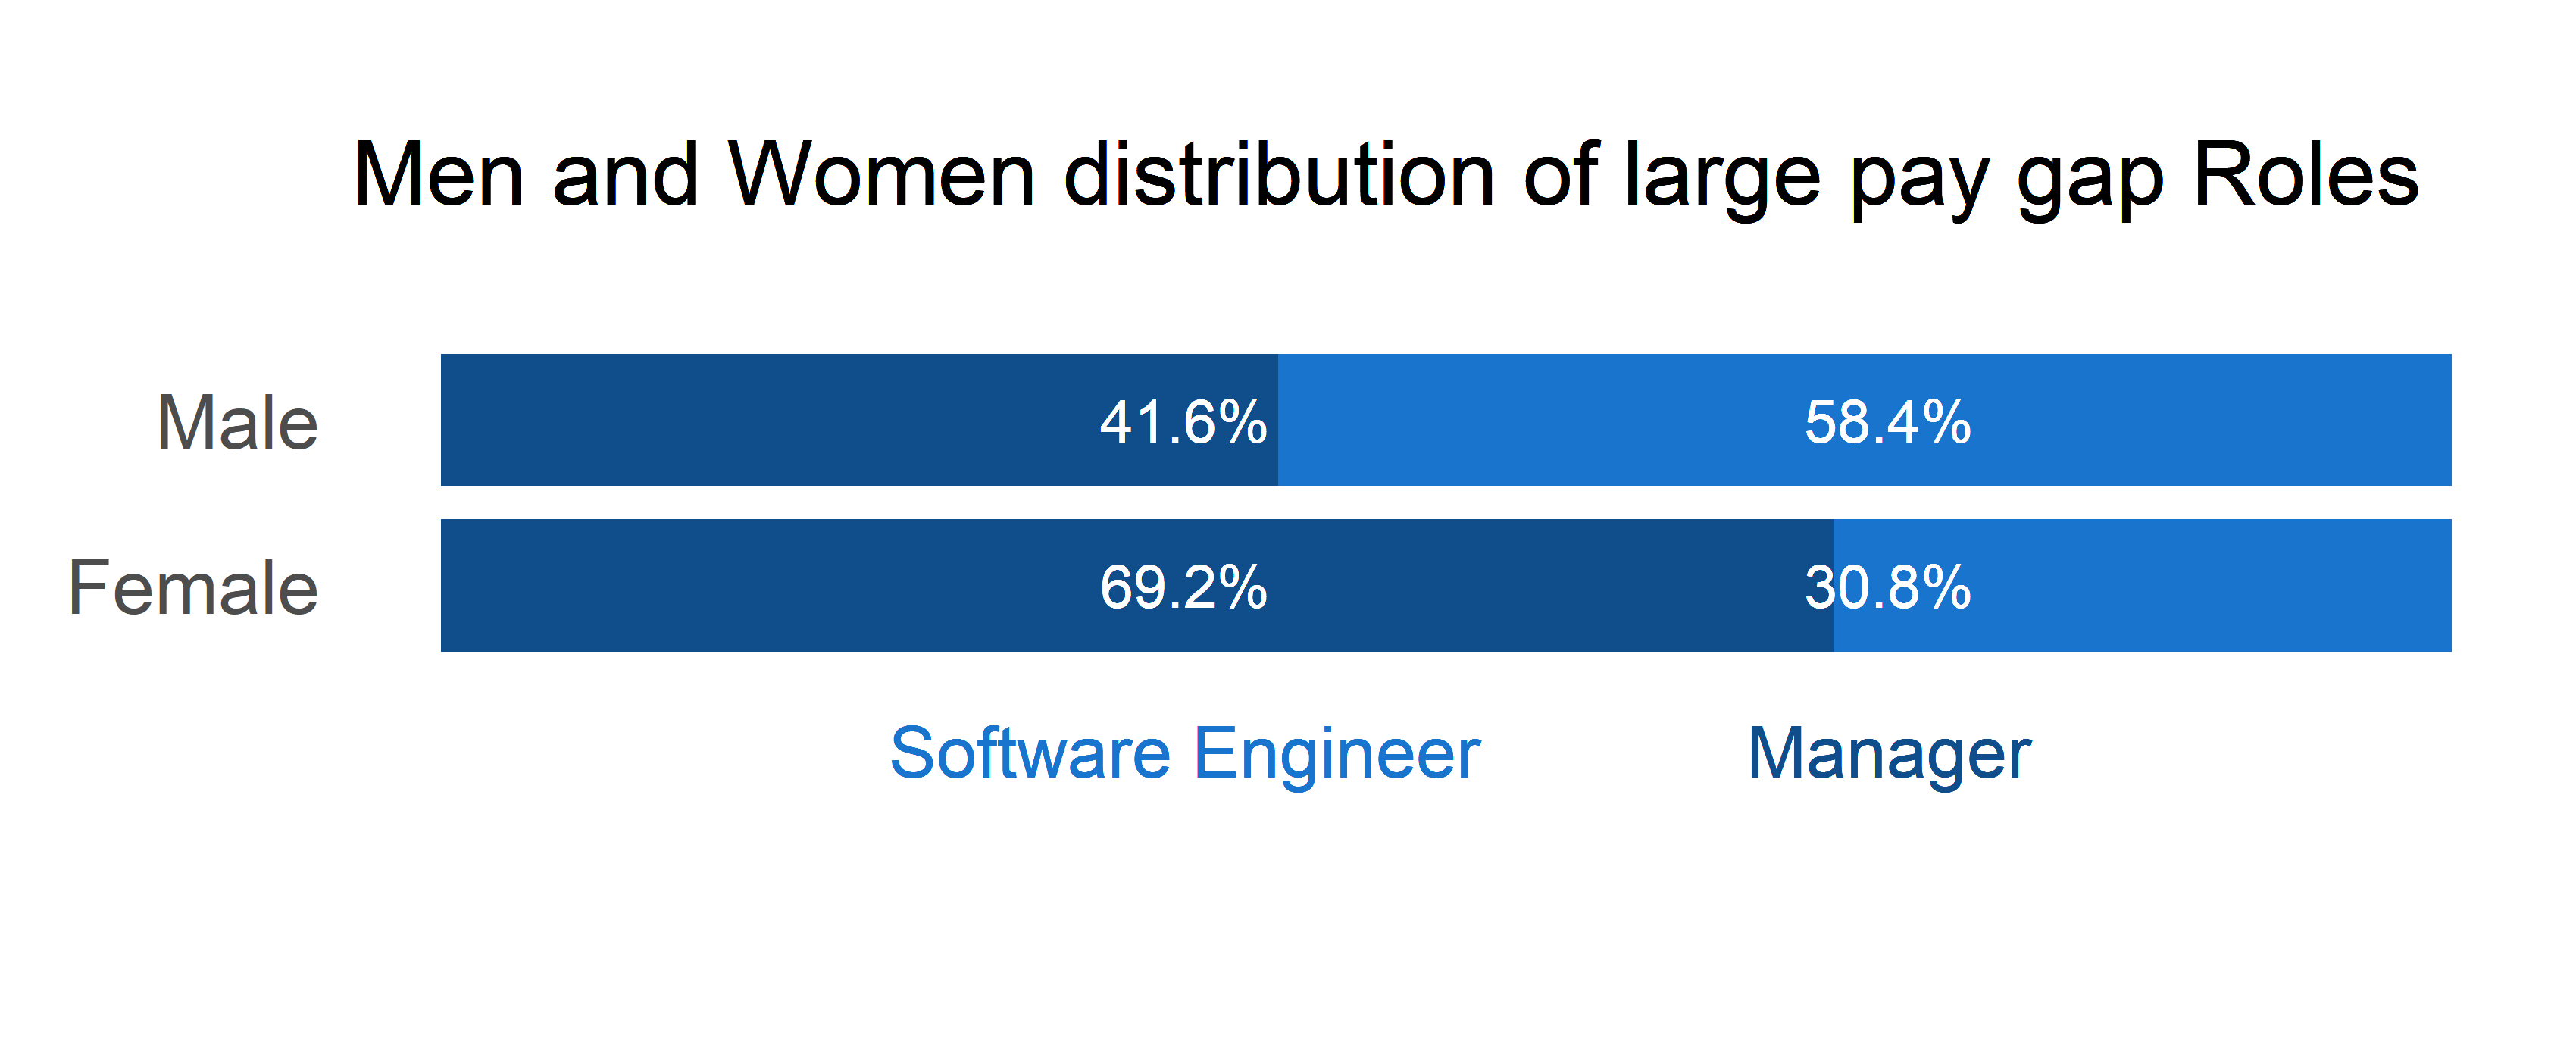

In [11]:
%%R -w 8.5 -h 3.5 --units in -r 400
ggplot(roles, aes(x = factor(Gender), y = Count, fill = JobTitle)) + 
geom_bar(position = position_fill(),stat = "identity", width=0.80) + 
scale_fill_manual(values = c("dodgerblue3", "dodgerblue4","gray59","gray81","gray27")) +
scale_y_continuous(labels = percent) +
scale_x_discrete(expand=c(0.4, 2)) +
coord_flip() +
theme(legend.position = "none",
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        axis.text.y = element_text(size = 18),
        axis.text.x = element_blank(),
        axis.title = element_text(face = "bold",size=8),
        panel.background = element_blank()) +
geom_text(aes(label = 'Software Engineer'), x=0, y=0.37,size=6, color="dodgerblue3") +
geom_text(aes(label = 'Manager'), x=0, y=0.72,size=6, color="dodgerblue4") +
geom_text(aes(label = '58.4%'), x=2, y=0.72,size=5, color="white") +
geom_text(aes(label = '41.6%'), x=2, y=0.37,size=5, color="white") +
geom_text(aes(label = '30.8%'), x=1, y=0.72,size=5, color="white") +
geom_text(aes(label = '69.2%'), x=1, y=0.37,size=5, color="white") +
xlab('') +
ylab('') +
geom_text(aes(label = 'Men and Women distribution of large pay gap Roles'), x=3.5, y=0.47,size=7.5, color="black") 
#ggsave('./role_distribution.pdf', units = 'in', width = 12, height = 5) 

In [12]:
graph4 = df
graph4.loc[graph4['Education'].isna(), 'Education'] = 'Other'
graph4.loc[graph4['Education'] == 'I prefer not to answer', 'Education'] = 'Other'
graph4.loc[graph4['Education'] == 'Some college/university study without earning a bachelor’s degree', 'Education'] = 'Other'
graph4['Education'].unique()

array(['High School', 'PhD', 'College', 'Masters'], dtype=object)

In [13]:
graph_4_female_data = graph4[graph4['Gender'].isin(['Female'])]
graph_4_male_data = graph4[graph4['Gender'].isin(['Male'])]

In [14]:
a = 100*graph4.groupby(['Gender','Education']).count()/graph4.groupby('Gender').count()
a = a['BasePay'].reset_index()
a_male = a.loc[a['Gender']=='Male'].reset_index()
a_female = a.loc[a['Gender']=='Female'].reset_index()
a_female['diff'] = a_female['BasePay'] - a_male['BasePay']
graph4 = a_female[['Education','diff']]

In [15]:
graph4['fill'] = 'female'
graph4.loc[graph4['diff']<0,'fill']='male'
graph4 =graph4.sort_values('diff', ascending=True)

### ordering the variables as categorical
graph4.Education = graph4.Education.astype(pd.api.types.CategoricalDtype(categories=list(graph4.Education), ordered = True), )

C:\Users\julon\AppData\Local\Temp\ipykernel_30508\630181427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph4['fill'] = 'female'


In [16]:
%R -i graph4

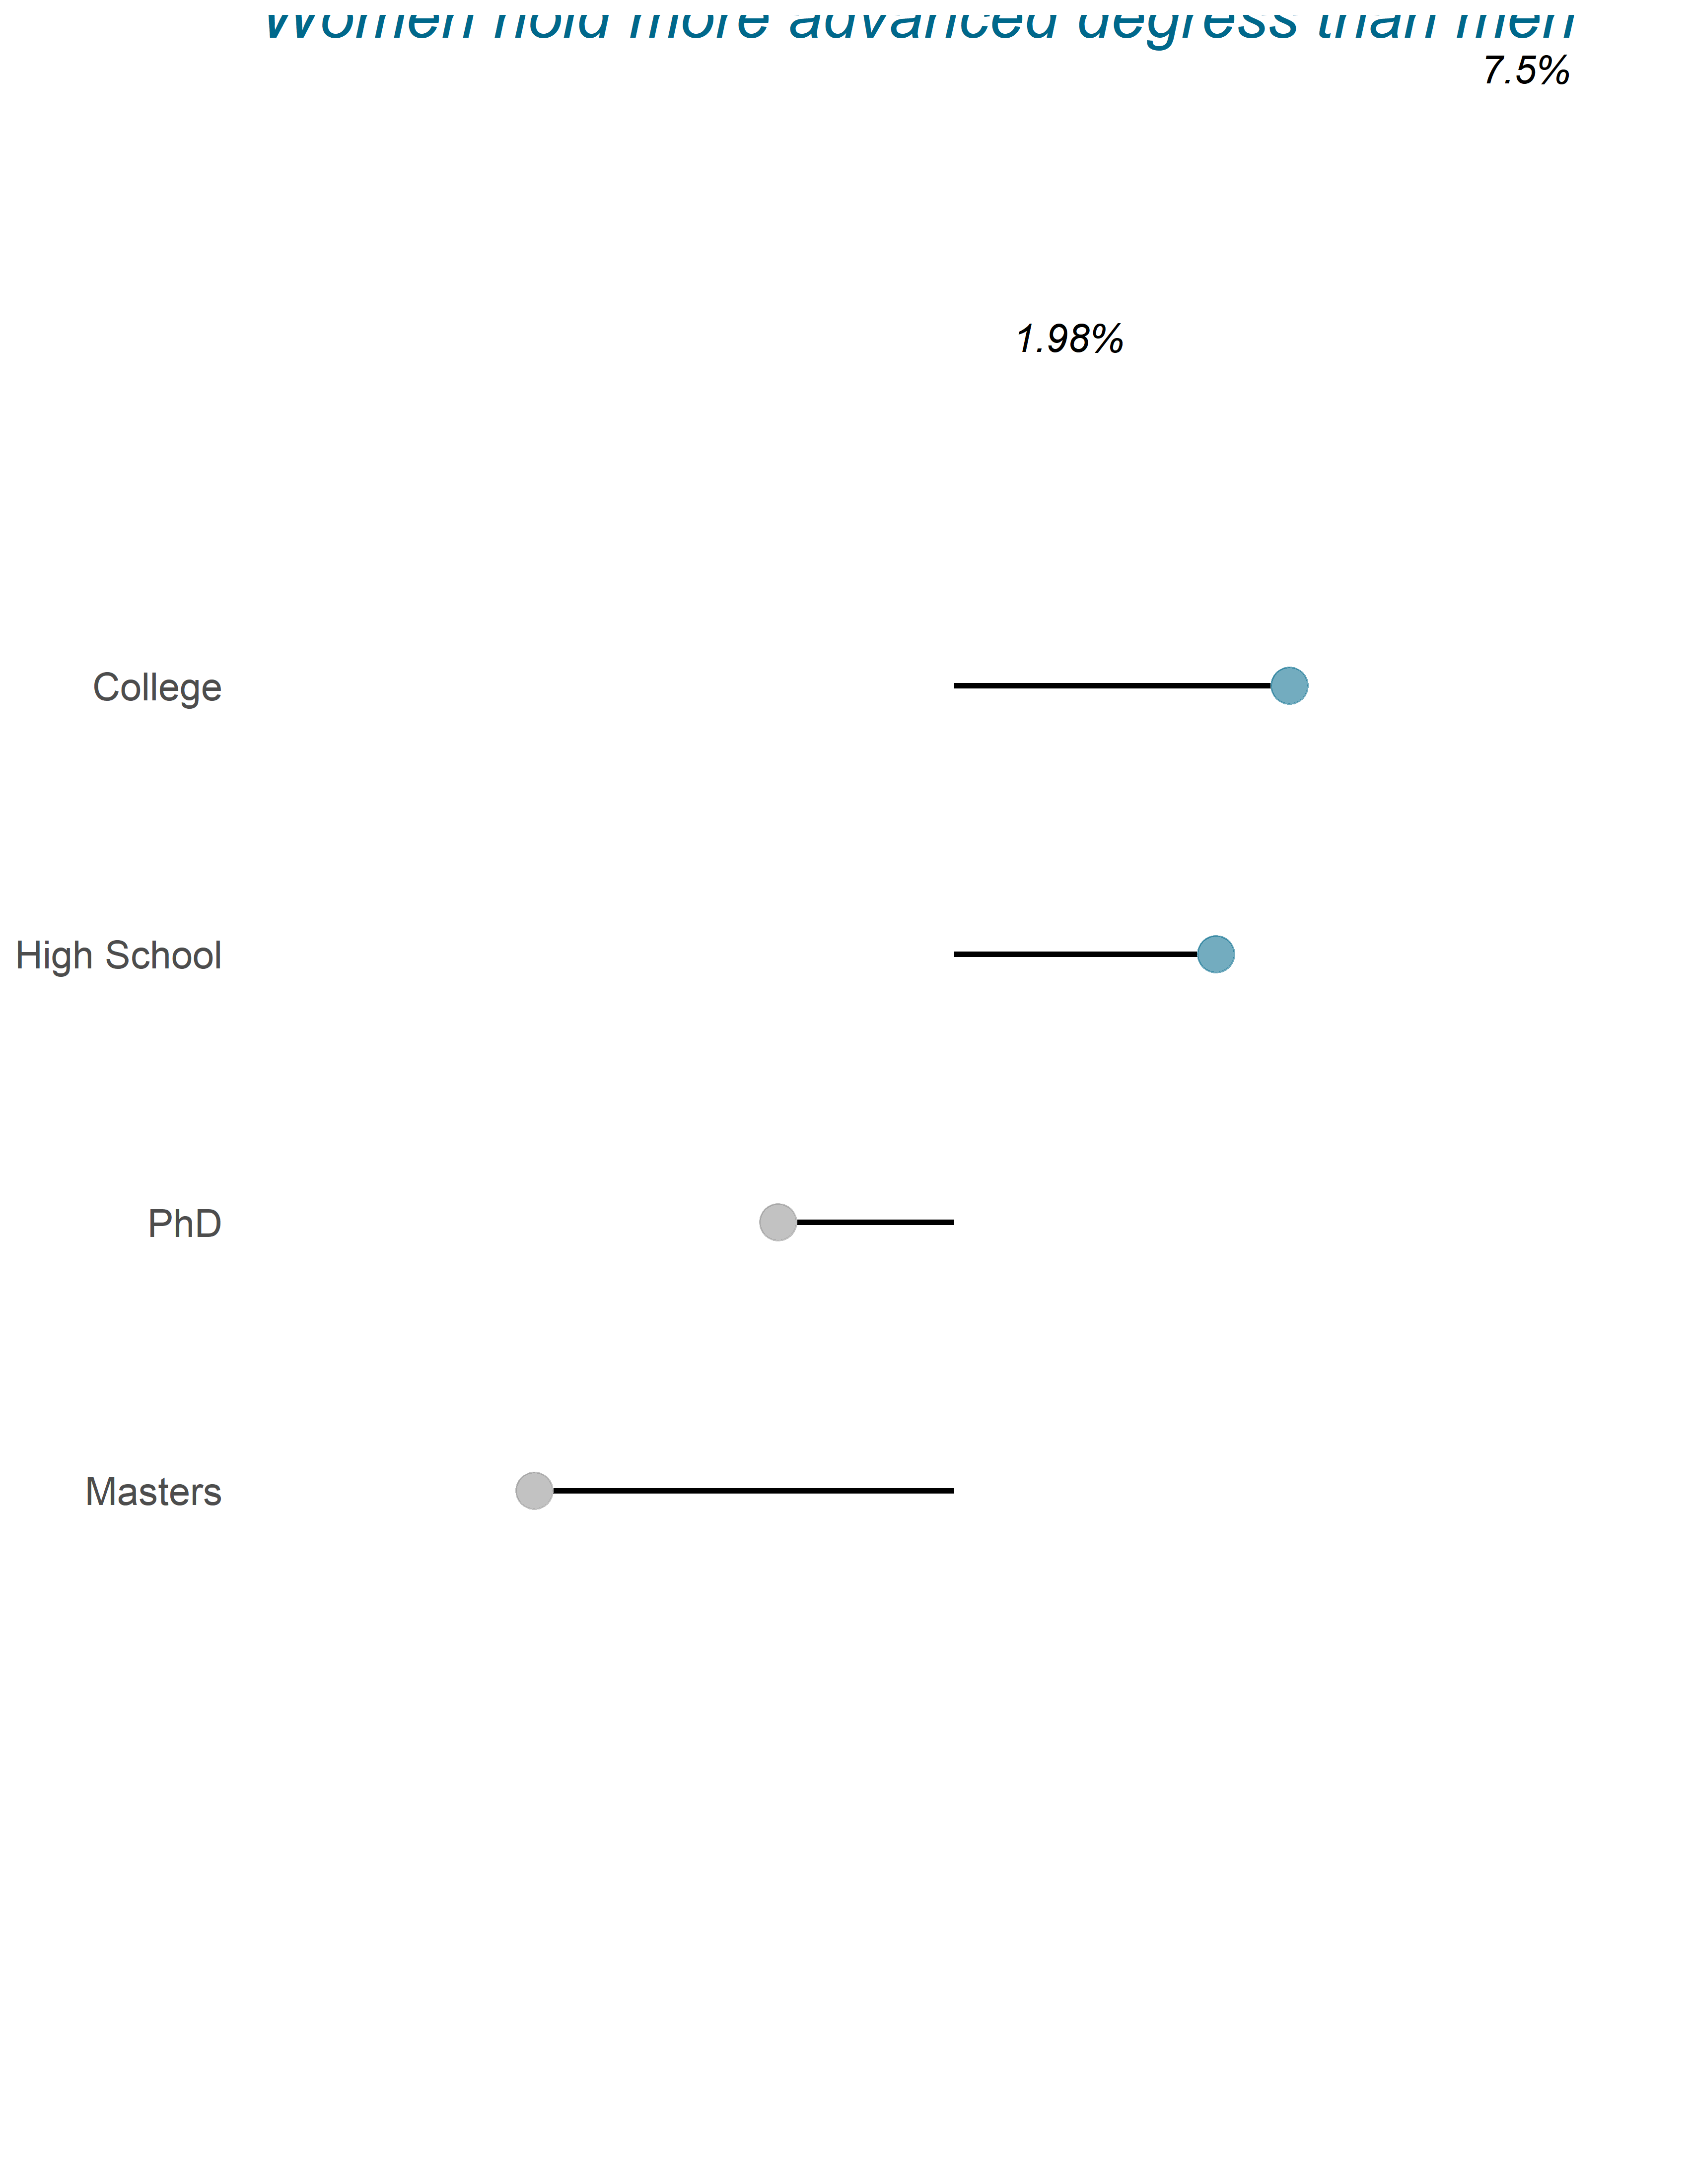

In [18]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot()+
    geom_segment(aes(x=0,y=Education, xend=diff,yend=Education,size=6), data=graph4)+
    geom_point(aes(x=diff,y=Education, size=6.5), color='white', data=graph4)+
    geom_point(aes(x=diff,y=Education,color=fill, size=6.5, alpha=0.8), data=graph4)+
    theme_classic()+
    scale_colour_manual(values = c("deepskyblue4","grey56"))+
    scale_y_discrete( expand=c(0.5, 1)) +
    scale_x_continuous(limits = c(-8, 8), breaks = seq(-8, 8, by =1))+
    theme(
          legend.position = "none",
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x = element_blank(),
          axis.line=element_blank(),
          axis.ticks = element_blank(),
          axis.text.y=element_text(size=14))+
    annotate("text", x = 7, y = 6.3, label = "7.5%",fontface = 'italic', size=5)+
    annotate("text", x = 1.4, y = 5.3, label = "1.98%",fontface = 'italic', size=5)+
    annotate("text", x =-0.45, y = 6.5, label = "Women hold more advanced degress than men",fontface = 'italic', size=8, color='deepskyblue4')

#ggsave('education_levels.pdf', units = 'in', width = 8.5, height = 11)

In [19]:
## filtering for education levels
edu = df['Education'].isin(['PhD', "Masters", "College",'High School'])
salary_data = df[edu]

In [20]:
salary_data.shape

(1000, 14)

In [21]:
list(salary_data['Salary'].unique())

['0-40,000', '45,000-85,000', '90,000-130,000', '135,000-180,000']

In [22]:
salary_brackets =[
'0-40,000', 
'45,000-85,000', 
'90,000-130,000', 
'135,000-180,000'
 ]

In [23]:
## getting numerical salary brackets (exclude nan and 'do not wish to disclose')
new = salary_data['Salary'].isin(salary_brackets)
salaries = salary_data[['Gender','Education','Salary']][new]
salaries['c'] = 1
salaries.head()

,Gender,Education,Salary,c
0,Female,High School,"0-40,000",1
1,Female,PhD,"0-40,000",1
2,Female,High School,"0-40,000",1
3,Male,College,"0-40,000",1
4,Female,High School,"0-40,000",1


In [24]:
## calculating the mean salary based on gender and education levels
new = salary_data['Salary'].isin(salary_brackets)
salaries = salary_data[['Gender','Education','Salary']][new]
salaries['c'] = 1
salaries.head()

salaries = salaries.groupby(['Gender','Education','Salary']).count()

salaries = salaries.reset_index()
salaries.columns = ['Gender','Education', 'Salary','Count']

salaries['Max_sal'] = salaries['Salary'].str.split('-',expand=True)[1]
salaries.loc[salaries.Max_sal.isna(),'Max_sal'] = '500,000'

salaries['Max_sal'] = salaries['Max_sal'].str.replace(',', '').astype(float)

salaries['salary_age_totals'] = salaries['Count']*salaries['Max_sal']
salaries.head()

salary_aggs = salaries.groupby(['Gender','Education']).sum()

salary_aggs = salary_aggs.reset_index()

salary_aggs['mean_salary'] =  salary_aggs['salary_age_totals']/salary_aggs['Count']

salary_aggs

,Gender,Education,Count,Max_sal,salary_age_totals,mean_salary
0,Female,College,123,435000.0,13565000.0,110284.552846
1,Female,High School,132,435000.0,14640000.0,110909.090909
2,Female,Masters,107,435000.0,12575000.0,117523.364486
3,Female,PhD,106,435000.0,12935000.0,122028.301887
4,Male,College,118,435000.0,14290000.0,121101.694915
5,Male,High School,133,395000.0,15385000.0,115676.691729
6,Male,Masters,149,395000.0,18835000.0,126409.395973
7,Male,PhD,132,395000.0,16820000.0,127424.242424


In [25]:
### finding the mean salary in terms of 1000$
salary_aggs2 = salary_aggs.loc[salary_aggs['Education'].isin(['PhD', "Masters", "High School",  'College'])]
salary_aggs2['sal'] = round(salary_aggs2['mean_salary']/1000)
salary_aggs2 = salary_aggs2[['Education','sal', 'Gender']]
salary_aggs2.Education = salary_aggs2.Education.astype(pd.api.types.CategoricalDtype(categories=["College","High School","Masters",'PhD'], ordered = True), )

In [26]:
salary_aggs2

,Education,sal,Gender
0,College,110.0,Female
1,High School,111.0,Female
2,Masters,118.0,Female
3,PhD,122.0,Female
4,College,121.0,Male
5,High School,116.0,Male
6,Masters,126.0,Male
7,PhD,127.0,Male


In [27]:
%R -i salary_aggs2

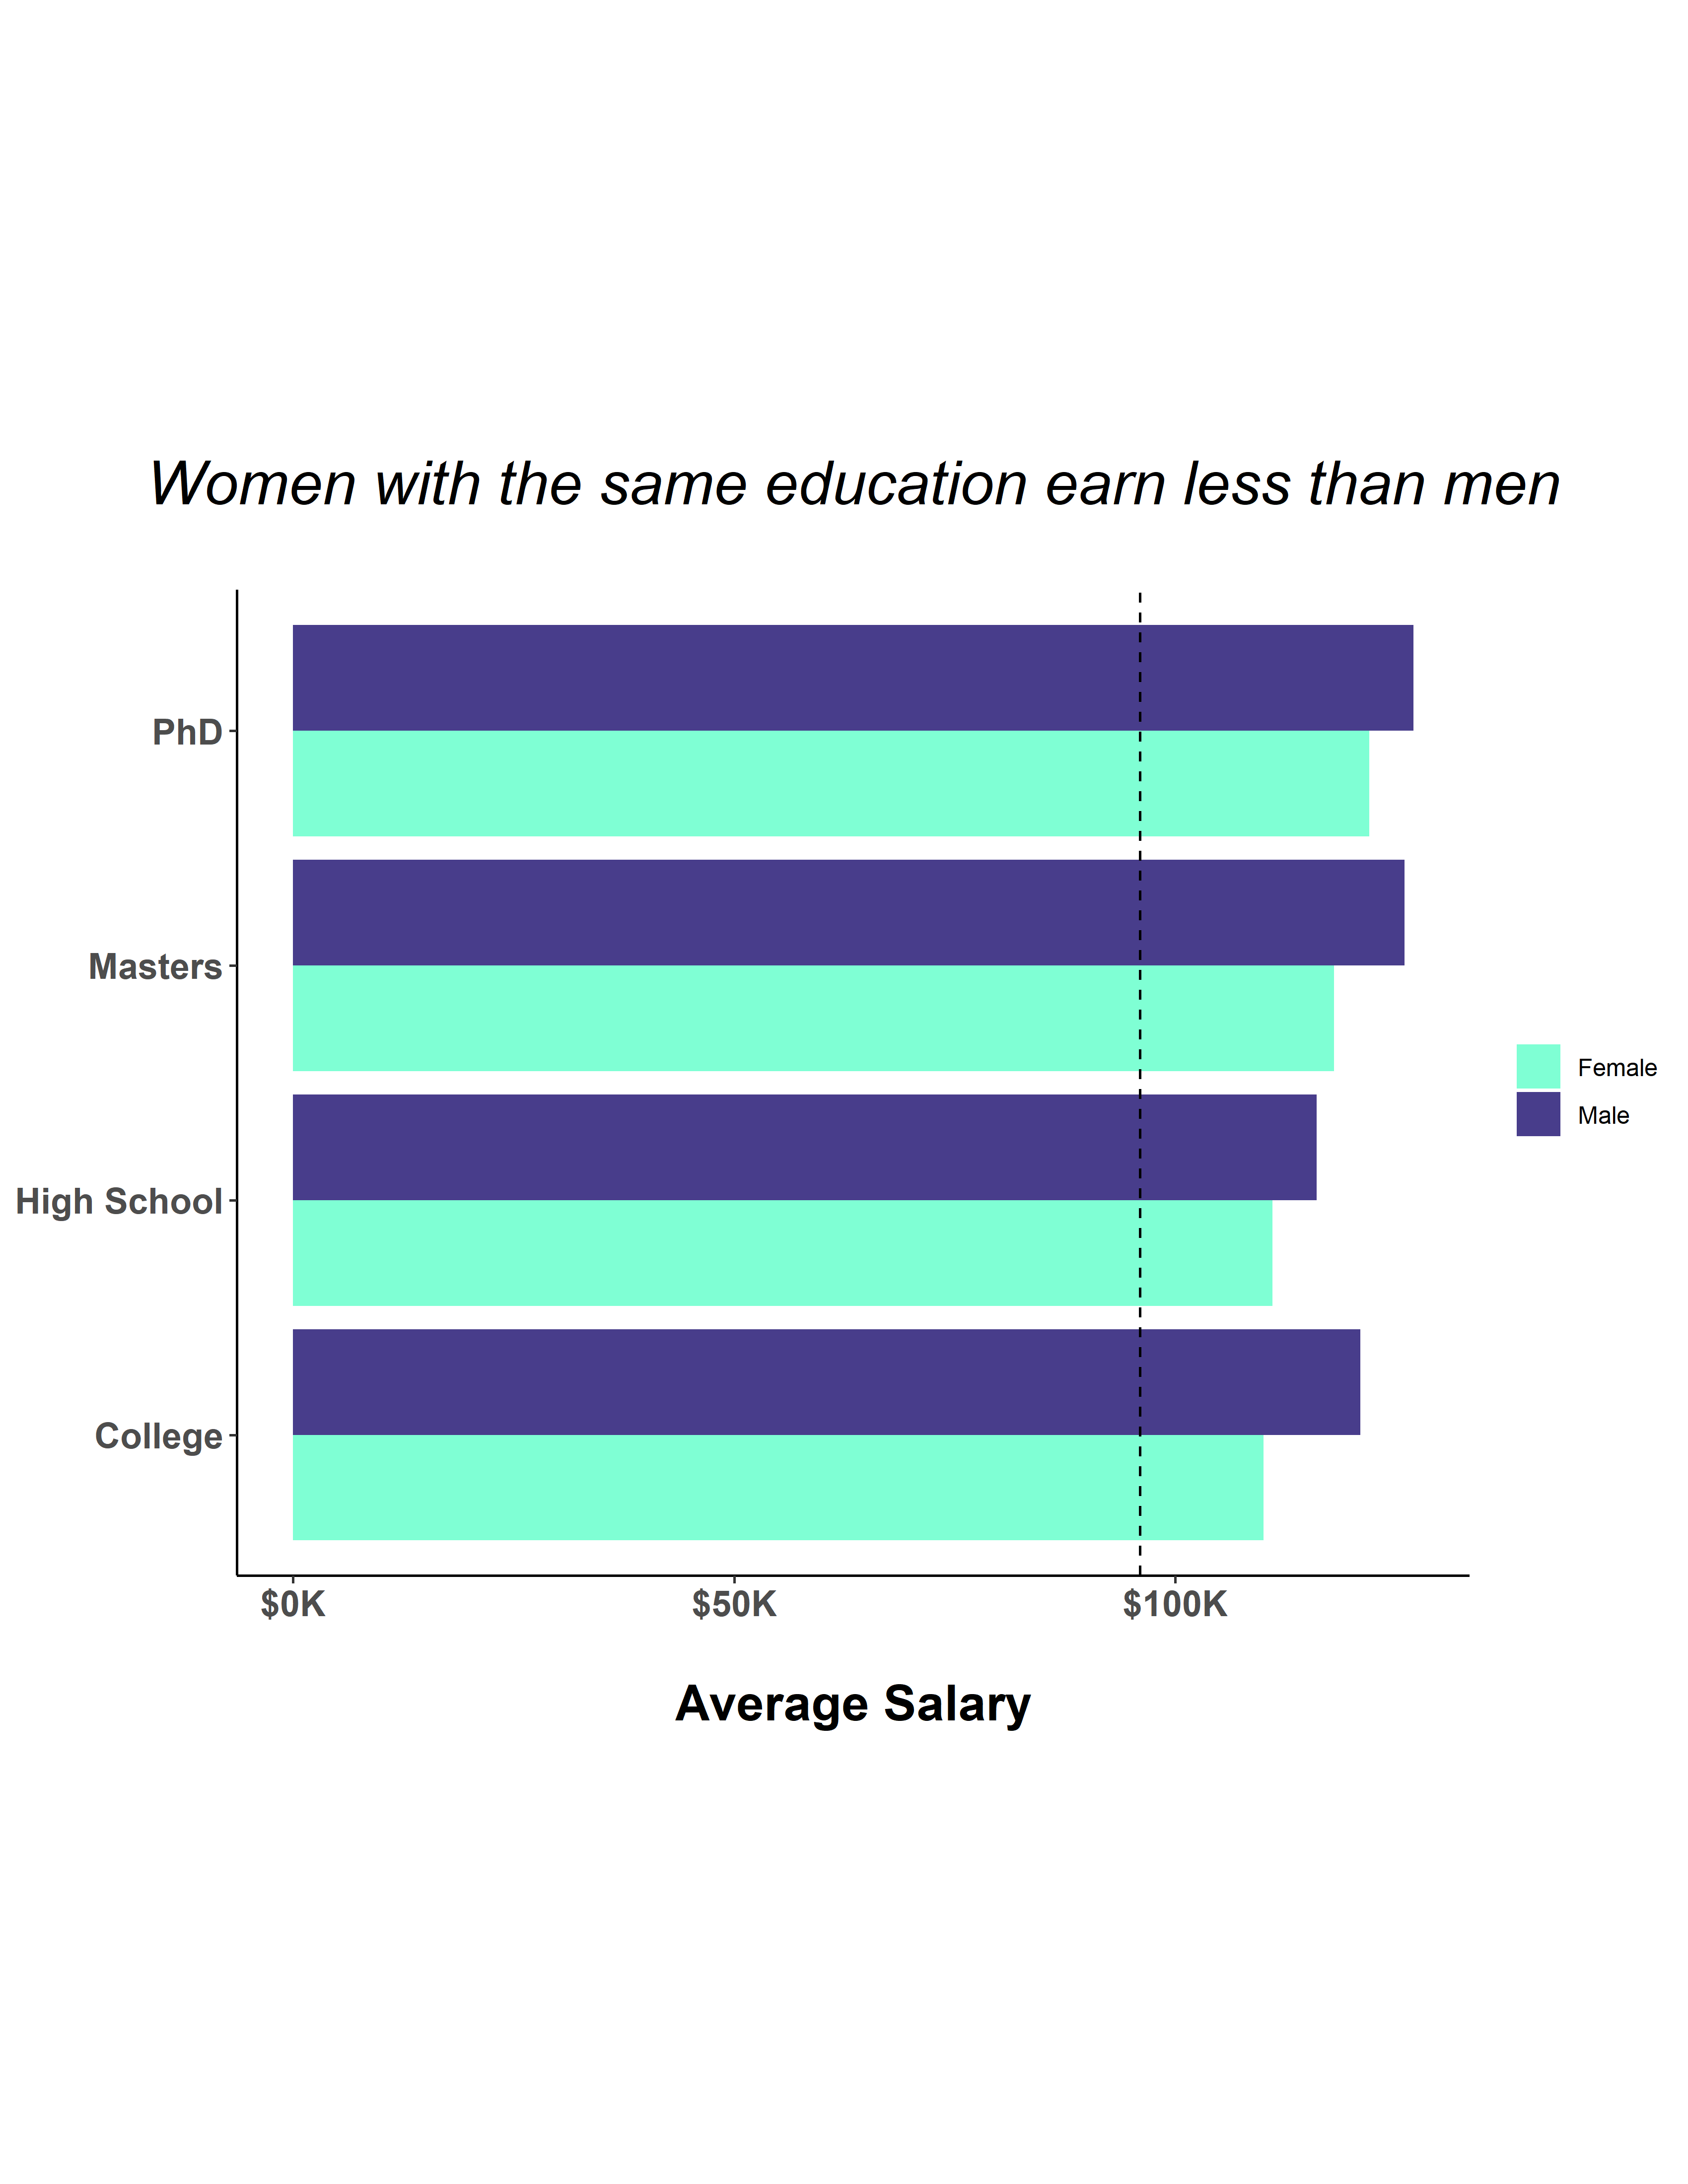

In [28]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot()+
    geom_bar(aes(x=Education, y=sal, fill=Gender),data=salary_aggs2,stat='identity', 
             position="dodge")+
    scale_y_continuous(labels = scales::dollar_format(prefix="$", suffix = "K"))+
    coord_flip()+
    theme_classic()+
    scale_fill_manual(values = c("aquamarine","darkslateblue"))+
    theme(aspect.ratio=0.8,
          legend.title = element_blank(),
          axis.title.y = element_blank())+
    ylab("\nAverage Salary")+
    labs(title = "Women with the same education earn less than men\n")+
    theme(plot.title = element_text(size = 22,hjust = 0.5, vjust=0.5, face='italic'))+
    geom_hline(yintercept = 96, size = 0.5, linetype = 'dashed')+
    theme(
        panel.background = element_blank(),
        axis.text.y = element_text(face = "bold",size = 13),
        axis.text.x = element_text(face = "bold",size = 13),
        axis.title = element_text(face = "bold",size=18))
#ggsave('./education_vs_salary.pdf', units = 'in', width = 8.5, height = 11) 

In [29]:
#getting relevant ages
ages = df['Age bin'].isin(['16-19', '20-24', '25-34', '35-44', '45-54', '55-65'])
salary_age_data = df[ages]

In [30]:
salary_age_data['Age bin'].unique()

array(['16-19', '20-24', '25-34', '35-44', '45-54', '55-65'], dtype=object)

In [31]:
new = salary_age_data['Salary'].isin(salary_brackets)
salaries = salary_age_data[['Gender','Age bin','Salary']][new]
salaries['c'] = 1
salaries.head()

,Gender,Age bin,Salary,c
0,Female,16-19,"0-40,000",1
1,Female,20-24,"0-40,000",1
2,Female,25-34,"0-40,000",1
3,Male,25-34,"0-40,000",1
4,Female,35-44,"0-40,000",1


In [32]:
#finding mean salary
salaries = salaries.groupby(['Gender','Age bin','Salary']).count()
salaries = salaries.reset_index()
salaries.columns = ['Gender','Age', 'Salary','Count']
salaries['Max_sal'] = salaries['Salary'].str.split('-',expand=True)[1]
salaries.loc[salaries.Max_sal.isna(),'Max_sal'] = '500,000'
salaries['Max_sal'] = salaries['Max_sal'].str.replace(',', '').astype(float)
salaries['salary_age_totals'] = salaries['Count']*salaries['Max_sal']
salary_aggs = salaries.groupby(['Gender','Age']).sum().reset_index()
salary_aggs['mean_salary'] =  salary_aggs['salary_age_totals']/salary_aggs['Count']
salary_aggs['mean_salary'] = round(salary_aggs['mean_salary']/1000)

In [33]:
%R -i salary_aggs

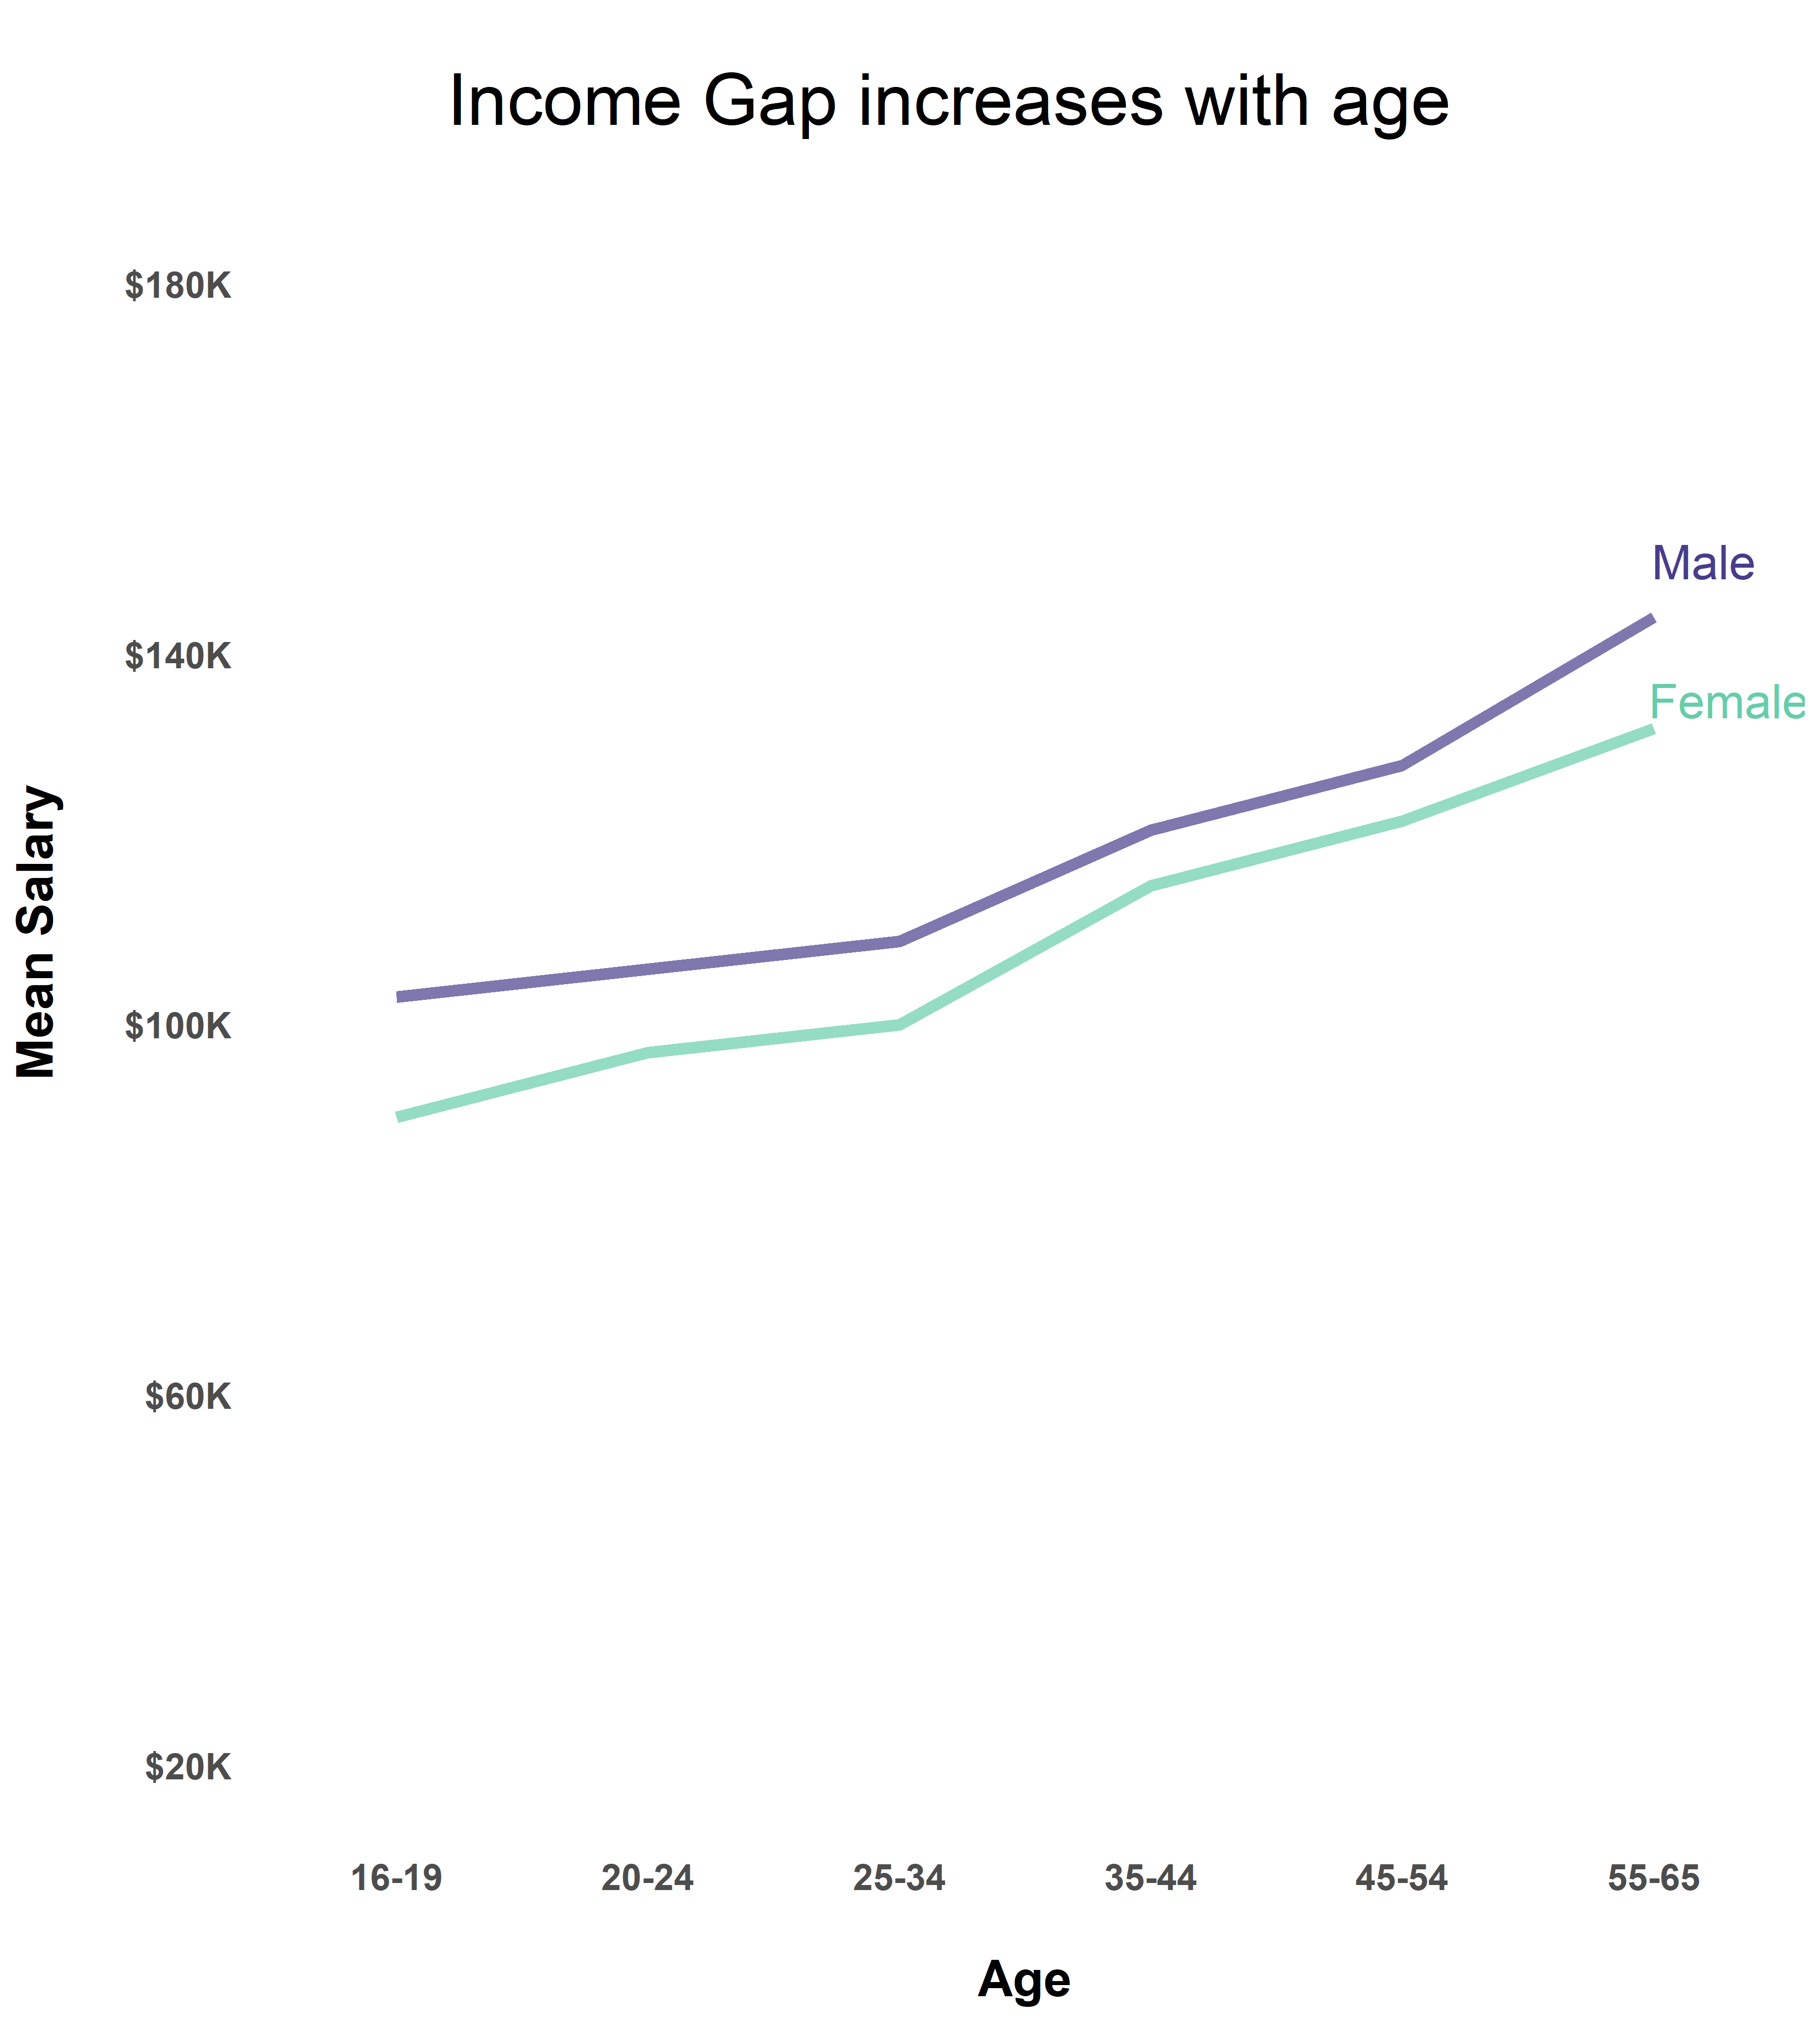

In [34]:
%%R -w 9 -h 10 --units in -r 400
ggplot() + 
geom_line(data=salary_aggs, aes(x=Age,y=mean_salary,group=Gender,color=Gender),size=2, alpha=0.7) +
scale_color_manual(values = c("aquamarine3", "darkslateblue")) +
theme(plot.title = element_text(size = 22,hjust = 0.5),
        plot.subtitle = element_text(size = 18,hjust = 0.5),
        legend.title = element_blank()) +
scale_y_continuous(limits = c(20, 200),breaks = seq(20, 200, by = 40),labels =scales::dollar_format(prefix="$", suffix = "K")) +
geom_text(aes(label = 'Female'), x=6.3, y=135,size=6, color="aquamarine3") +
geom_text(aes(label = 'Male'), x=6.2
          , y=150,size=6, color="darkslateblue") +
geom_text(aes(label = 'Income Gap increases with age'), x=3.2, y=200,size=9, color="black") +
ylab('Mean Salary\n') +
xlab('\nAge') +
theme(legend.position = "none",
    panel.background = element_blank(),
    axis.text.y = element_text(face = "bold",size = 13),
    axis.text.x = element_text(face = "bold",size = 13),
    axis.title = element_text(face = "bold",size=18),
    axis.ticks = element_blank())
#ggsave('./income_gap.pdf', units = 'in', width = 9, height = 10) 

In [35]:
pip install jovian

Note: you may need to restart the kernel to use updated packages.


In [36]:
import jovian as jvn

In [37]:
jvn.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [38]:
!pip install jovian